# Q1 : Bias Variance Tradeoff

Change the maximum degree of the model from [1,3,100], sample size [2,39,100] plot all the cases and describe why the plot shows for example for sizesample one all horizon line because take one point as regresssion

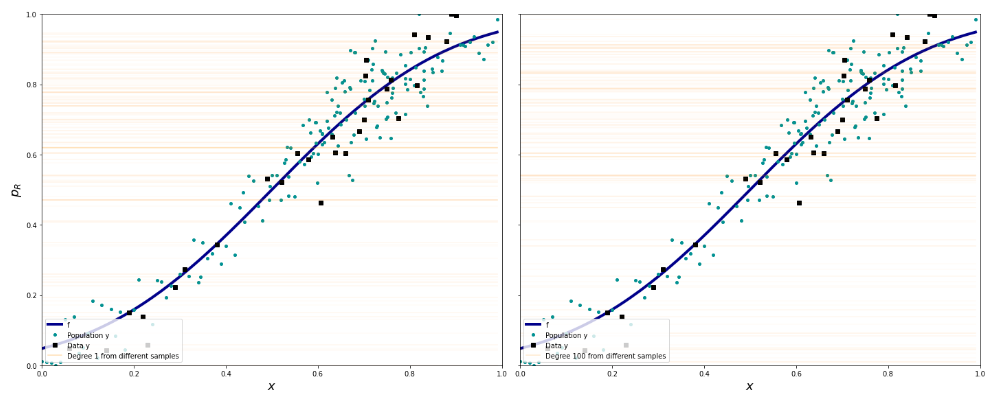

For example : the plot above is degree 1 and 100 with sample size [1] and you need to describe why all the orange lines are horizontal

In [ ]:
#Importing libraries
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
#Helper function to set plot characteristics

def make_plot():
    fig, axes=plt.subplots(figsize=(20,8), nrows=1, ncols=2);
    axes[0].set_ylabel("$p_R$", fontsize=18)
    axes[0].set_xlabel("$x$", fontsize=18)
    axes[1].set_xlabel("$x$", fontsize=18)
    axes[1].set_yticklabels([])
    axes[0].set_ylim([0,1])
    axes[1].set_ylim([0,1])
    axes[0].set_xlim([0,1])
    axes[1].set_xlim([0,1])
    plt.tight_layout();
    return axes

In [ ]:
# Reading the file into a dataframe

df = pd.read_csv("noisypopulation.csv")
df.head()

,f,x,y
0,0.047790,0.00,0.011307
1,0.051199,0.01,0.010000
2,0.054799,0.02,0.007237
3,0.058596,0.03,0.000056
4,0.062597,0.04,0.010000


In [ ]:
# Set the predictor and response variable
# Column x is the predictor and column y is the response variable.
# Column f is the true function of the given data
# Select the values of the columns

x = df.x
y = df.y
f = df.f

In [ ]:
# Function to compute the Polynomial Features for the data x for the given degree d
def polyshape(d, x):
    return PolynomialFeatures(...).fit_transform(...)

In [ ]:
#Function to fit a Linear Regression model 
def make_predict_with_model(x, y, x_pred):
    
    #Create a Linear Regression model with fit_intercept as False
    lreg = LinearRegression()
    
    #Fit the model to the data x and y
    lreg.fit(...)
    
    #Predict on the x_pred data
    y_pred = lreg.predict( ...)
    return y_pred

In [ ]:
#Function to perform bootstrap and fit the data

# degree is the maximum degree of the model
# num_boot is the number of bootstraps
# size is the number of random points selected from the data for each bootstrap
# x is the predictor variable
# y is the response variable

def gen(degree, num_boot, size, x, y):
    
    #Create 2 lists to store the prediction and model
    predicted_values, linear_models =[], []
    
    #Run the loop for the number of bootstrap value
    for i in range(...):
        
        #Helper code to call the make_predict_with_model function to fit the data
        indexes=np.sort(np.random.choice(x.shape[0], size=size, replace=False))
        
        #lreg and y_pred hold the model and predicted values of the current bootstrap
        y_pred = make_predict_with_model(polyshape(degree, x[indexes]), y[indexes], polyshape(degree, x))
        
        #Append the model and predicted values into the appropriate lists
        predicted_values.append(...)

    
    #Return the 2 lists
    return predicted_values,

In [ ]:
# Call the function gen twice with x and y as the predictor and response variable respectively
# The number of bootstraps should be 200 and the number of samples from the dataset should be 30
# Store the return values in appropriate variables

# Get results for degree 1
predicted_1, model_1 = gen(....);

# Get results for degree 3
predicted_3, model_3 = gen(....);

# Get results for degree 100
predicted_100, model_100 = gen(...);

In [ ]:
#Helper code to plot the data

indexes=np.sort(np.random.choice(x.shape[0], size=30, replace=False))
print(indexes)
plt.figure(figsize = (12,8))
axes=make_plot()

#Plot for Degree 1
axes[0].plot(x,f,label="f", color='darkblue',linewidth=4)
axes[0].plot(x, y, '.', label="Population y", color='#009193',markersize=8)
axes[0].plot(x[indexes], y[indexes], 's', color='black', label="Data y")

for i,p in enumerate(predicted_1[:-1]):
    axes[0].plot(x,p,alpha=0.03,color='#FF9300')
axes[0].plot(x, predicted_1[-1], alpha=0.3,color='#FF9300',label="Degree 1 from different samples")

#Plot for Degree 3
axes[1].plot(x,f,label="f", color='darkblue',linewidth=4)
axes[1].plot(x, y, '.', label="Population y", color='#009193',markersize=8)
axes[1].plot(x[indexes], y[indexes], 's', color='black', label="Data y")

for i,p in enumerate(predicted_3[:-1]):
    axes[1].plot(x,p,alpha=0.03,color='#FF9300')
axes[1].plot(x, predicted_3[-1], alpha=0.3,color='#FF9300',label="Degree 1 from different samples")



#Plot for Degree 100
axes[2].plot(x,f,label="f", color='darkblue',linewidth=4)
axes[2].plot(x, y, '.', label="Population y", color='#009193',markersize=8)
axes[2].plot(x[indexes], y[indexes], 's', color='black', label="Data y")


for i,p in enumerate(predicted_100[:-1]):
    axes[2].plot(x,p,alpha=0.03,color='#FF9300')
axes[2].plot(x,predicted_100[-1],alpha=0.2,color='#FF9300',label="Degree 100 from different samples")

axes[0].legend(loc='best')
axes[1].legend(loc='best')
axes[2].legend(loc='best')

#edgecolor='black', linewidth=3, facecolor='green',
plt.show()

# Q2 : Regularization with Cross-validation

In this problem, you will learn how to use Ridge regression from sklearn module.
- Initialize the parameters (list for ran_state, list of alphas, and degree)
- Read polynomial50.csv
- Plot 2 plots in one figure
    - plot the column x and y as dot
    - plot the column x and f as line
    
- Initialising required parameters

    ran_state = [0, 10, 21, 42, 66, 109, 310, 1969]
    
    alphas = [1e-7,1e-5, 1e-3, 0.01, 0.1, 1]
    
    degree= 30

  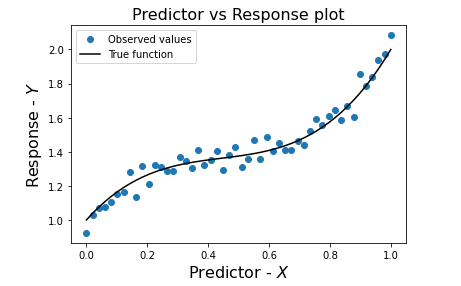

**Follow the template below**

In [ ]:
# Function to perform regularization with simple validation
def reg_with_validation(rs):
    
    # Do splitting for training and validation set with the random state the is passed on. Use train_size from 70% to 80%
    # Use polyfeatures for training and valid data. If you don't use polyfeatures, the figure will not be correct.
    # Use ridge regression for different alphas
    # Find the MSE for training and the validation, append it for all alphas
    # training_error and validation_error would be in the form of list
  return training_error, validation_error


# Initialise a list to store the best alpha using simple validation for varying random states
best_alpha = []

# Run a loop for different random_states
for i in range(len(ran_state)):
    # Get the train and validation error by calling the function reg_with_validation
    training_error, validation_error = reg_with_validation(...)

    # Get the best mse from the validation_error list
    best_mse  = ...
    
    # Get the best alpha value based on the best mse
    best_parameter = ...
    
    # Append the best alpha to the list
    best_alpha.append(...)
    
    # Use the helper code given below to plot the graphs
    fig, ax = plt.subplots(figsize = (6,4))
    
    # Plot the training errors for each alpha value
    ax.plot(alphas,training_error,'s--', label = 'Training error',color = 'Darkblue',linewidth=2)
    
    # Plot the validation errors for each alpha value
    ax.plot(alphas,validation_error,'s-', label = 'Validation error',color ='#9FC131FF',linewidth=2 )

    # Draw a vertical line at the best parameter
    ax.axvline(best_parameter, 0, 0.75, color = 'r', label = f'Min validation error at alpha = {best_parameter}')

    ax.set_xlabel('Value of Alpha',fontsize=15)
    ax.set_ylabel('Mean Squared Error',fontsize=15)
    ax.set_ylim([0,0.010])
    ax.legend(loc = 'best',fontsize=12)
    bm = round(best_mse, 5)
    ax.set_title(f'Best alpha is {best_parameter} with MSE {bm}',fontsize=16)
    ax.set_xscale('log')
    plt.tight_layout()
    plt.show()

If your training data size is 80% of the data. You will have one of the outputs as follow, similar to the one on the practice notebook we shared. There will be 8 plots, since there 8 random states.


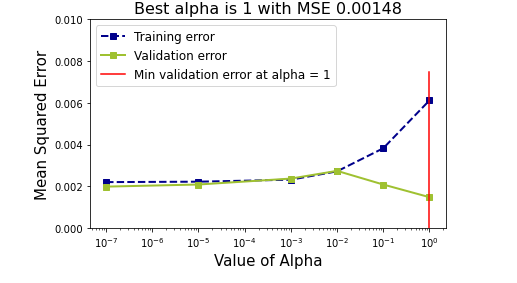

- Try with the cross validation
- Follow the template

In [ ]:
def reg_with_cross_validation(rs):
    
    # Sample your data to get different splits using the random state, use df.sample()
    df_new = ...
    # Assign the values of the 'x' column as the predictor from your sampled dataframe
    ....
    # Assign the values of the 'y' column as the response from your sampled dataframe
    ...
    # Create two lists for training and validation error
    training_error, validation_error = [],[]

    # Compute the polynomial features on the entire data
    x_poly = PolynomialFeatures(...).fit_transform(...)
    
    # Run a loop for all alpha values
    for alpha in alphas:

        # Initialise a Ridge regression model by specifying the alpha value and with fit_intercept=False
        ridge_reg = Ridge(...)
        
        # Perform cross validation on the modified data with neg_mean_squared_error as the scoring parameter and cv=5
        # Remember to get the train_score
        ridge_cv = cross_validate(...)
        # Compute the training and validation errors got after cross validation
        mse_train = ...
        mse_val = ...        
        # Append the MSEs to their respective lists 
        training_error.append(mse_train)
        validation_error.append(mse_val)
    
    # Return the train and validation MSE
    return training_error, validation_error


In [ ]:
# Initialise a list to store the best alpha using cross validation for varying random states
best_cv_alpha = []

# Run a loop for different random_states
for i in range(len(ran_state)):
    
    # Get the train and validation error by calling the function reg_with_cross_validation
    training_error, validation_error = reg_with_cross_validation(...)

    # Get the best mse from the validation_error list
    best_mse  = (...)
    
    # Get the best alpha value based on the best mse
    best_parameter = ....
    
    # Append the best alpha to the list
    best_cv_alpha.append(best_parameter)
    
    # Use the helper code given below to plot the graphs
    fig, ax = plt.subplots(figsize = (6,4))
    
    # Plot the training errors for each alpha value
    ax.plot(alphas,training_error,'s--', label = 'Training error',color = 'Darkblue',linewidth=2)
    
    # Plot the validation errors for each alpha value
    ax.plot(alphas,validation_error,'s-', label = 'Validation error',color ='#9FC131FF',linewidth=2 )

    # Draw a vertical line at the best parameter
    ax.axvline(best_parameter, 0, 0.75, color = 'r', label = f'Min validation error at alpha = {best_parameter}')

    ax.set_xlabel('Value of Alpha',fontsize=15)
    ax.set_ylabel('Mean Squared Error',fontsize=15)
    ax.legend(loc = 'best',fontsize=12)
    bm = round(best_mse, 5)
    ax.set_title(f'Best alpha is {best_parameter} with MSE {bm}',fontsize=16)
    ax.set_xscale('log')
    plt.tight_layout()